In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [7]:
nubb = []

files = sorted(glob.glob("/Users/mistryk2/OneDrive - UT Arlington/Code/ATPC/job/test/ATPC_0nubb_15bar_smear_0.h5"))

for f in files:
    df = pd.read_hdf(f, "MC/hits")
    nubb.append(df)

nubb = pd.concat(nubb)
display(nubb)

,event_id,x,y,z,energy
0,10,734.257507,747.286377,407.156281,0.025544
1,10,733.923218,745.833191,407.317596,0.008581
2,10,733.471558,743.224731,409.578796,0.038614
3,10,734.668640,748.276306,409.884552,0.051311
4,10,735.319824,740.909668,411.686554,0.017038
...,...,...,...,...,...
435,17,478.943909,-210.892639,1555.289307,0.033480
436,17,478.334869,-221.047379,1555.338013,0.049327
437,17,497.179535,-182.626755,1555.836060,0.015624
438,17,494.626099,-182.191040,1556.005737,0.082187


In [8]:
print(len(nubb.event_id.unique()))

8


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_90104/3126012197.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 0, 'Energy [MeV]')

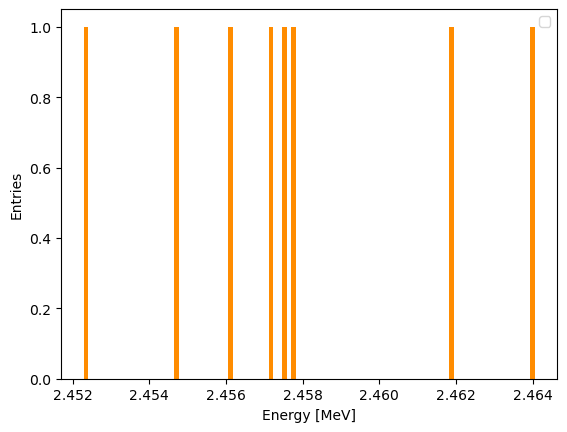

In [9]:
# Get the hit tables and plot the total energy deposited in the TPC
# Sum the energy of the hits and bin into a histogram
hit_tot_energy = nubb.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')


plt.figure()

plt.hist(hit_tot_energy.hit_tot_energy, bins=100, color=['darkorange']);

plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")
